# **API-BACEN**

In [5]:
! pip install sidrapy
! pip install seabornb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime as dt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (36,16)

Source: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

Getting data from BACEN-API

In [13]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [24]:
ipca       = consulta_bc(433)   # national consumer price index - IBGE
ipca_12    = consulta_bc(13522) # national consumer price index - IPCA - 12 months IBGE
selic      = consulta_bc(1178)  # Interest rate - Selic annualized base 252
selic_meta = consulta_bc(432)   # Interest rate - Meta Selic defined by Copom
cdi        = consulta_bc(4389)  # Interest rate - CDI annualized base 252
cdi_dia    = consulta_bc(12)    # Interest rate - CDI % a.d.
cdi_acum_mes     = consulta_bc(4391) # Interest rate - CDI accumulated in the month % a.m.
cdi_acum_mes_anu = consulta_bc(4392) # Interest rate - CDI accumulated in the month annualized base 252

In [25]:
selic[selic.index == '2021-10-13']

,valor
data,
2021-10-13,6.15


In [26]:
selic[selic.index == '2022-07-04']

,valor
data,
2022-07-04,13.15


In [27]:
selic['Accumulation Factor'] = [(1+valor/100)**(1/252) for valor in selic['valor'].values]

In [28]:
selic[selic.index == '2021-10-13']

,valor,Accumulation Factor
data,,
2021-10-13,6.15,1.000237


In [18]:
selic

,valor,Fator Acumulação
data,,
1986-06-04,17.80,1.000650
1986-06-05,18.50,1.000674
1986-06-06,18.31,1.000667
1986-06-09,18.76,1.000683
1986-06-10,18.40,1.000670
...,...,...
2022-11-11,13.65,1.000508
2022-11-14,13.65,1.000508
2022-11-16,13.65,1.000508


In [29]:
#annualized face value
selic['VNA'] = 0

In [31]:
for i in range(len(selic)):
    if selic.index[i] == dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = 100
        #print('deveria ser 1000')
    elif selic.index[i] > dt.datetime(2000, 7, 3):
        selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1]*selic['Accumulation Factor'].iloc[i-1]

/tmp/ipykernel_54496/2447172576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = 100
/tmp/ipykernel_54496/2447172576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selic['VNA'].iloc[i] = selic['VNA'].iloc[i-1]*selic['Accumulation Factor'].iloc[i-1]


In [32]:
selic

,valor,Accumulation Factor,VNA
data,,,
1986-06-04,17.80,1.000650,0.000000
1986-06-05,18.50,1.000674,0.000000
1986-06-06,18.31,1.000667,0.000000
1986-06-09,18.76,1.000683,0.000000
1986-06-10,18.40,1.000670,0.000000
...,...,...,...
2022-11-11,13.65,1.000508,1240.660128
2022-11-14,13.65,1.000508,1241.290235
2022-11-16,13.65,1.000508,1241.920662


In [33]:
selic[selic.index == '2022-10-04']

,valor,Accumulation Factor,VNA
data,,,
2022-10-04,13.65,1.000508,1224.389144


In [34]:
((1 + 17.26/100)**(1/252)-1)*100

0.06320389602327836

In [35]:
cdi

,valor
data,
1986-03-06,18.72
1986-03-10,18.99
1986-03-12,18.51
1986-03-14,17.67
1986-03-17,18.75
...,...
2022-11-10,13.65
2022-11-11,13.65
2022-11-14,13.65


In [36]:
tx_dia = (1+cdi['valor'][-1]/100)**(1/252) - 1
round(tx_dia*100,6)

0.050788

In [37]:
tx_dia

0.000507880373261882

In [38]:
# getting the CDI value by day

list_didia = []
for i in range(len(cdi)):
    list_didia.append(100*((1+cdi['valor'][i]/100)**(1/252) - 1))
cdi_dia = cdi.copy(deep=True)
cdi_dia['tx_dia'] = list_didia

In [39]:
cdi_dia

,valor,tx_dia
data,,
1986-03-06,18.72,0.068117
1986-03-10,18.99,0.069020
1986-03-12,18.51,0.067414
1986-03-14,17.67,0.064590
1986-03-17,18.75,0.068218
...,...,...
2022-11-10,13.65,0.050788
2022-11-11,13.65,0.050788
2022-11-14,13.65,0.050788


In [40]:
cdi_dia["tx_dia"]

data
1986-03-06    0.068117
1986-03-10    0.069020
1986-03-12    0.067414
1986-03-14    0.064590
1986-03-17    0.068218
                ...   
2022-11-10    0.050788
2022-11-11    0.050788
2022-11-14    0.050788
2022-11-16    0.050788
2022-11-17    0.050788
Name: tx_dia, Length: 9180, dtype: float64

In [41]:
selic_meta

,valor
data,
1999-03-05,45.00
1999-03-06,45.00
1999-03-07,45.00
1999-03-08,45.00
1999-03-09,45.00
...,...
2022-12-03,13.75
2022-12-04,13.75
2022-12-05,13.75


In [44]:
selic_meta[-100:]

,valor
data,
2022-08-30,13.75
2022-08-31,13.75
2022-09-01,13.75
2022-09-02,13.75
2022-09-03,13.75
...,...
2022-12-03,13.75
2022-12-04,13.75
2022-12-05,13.75


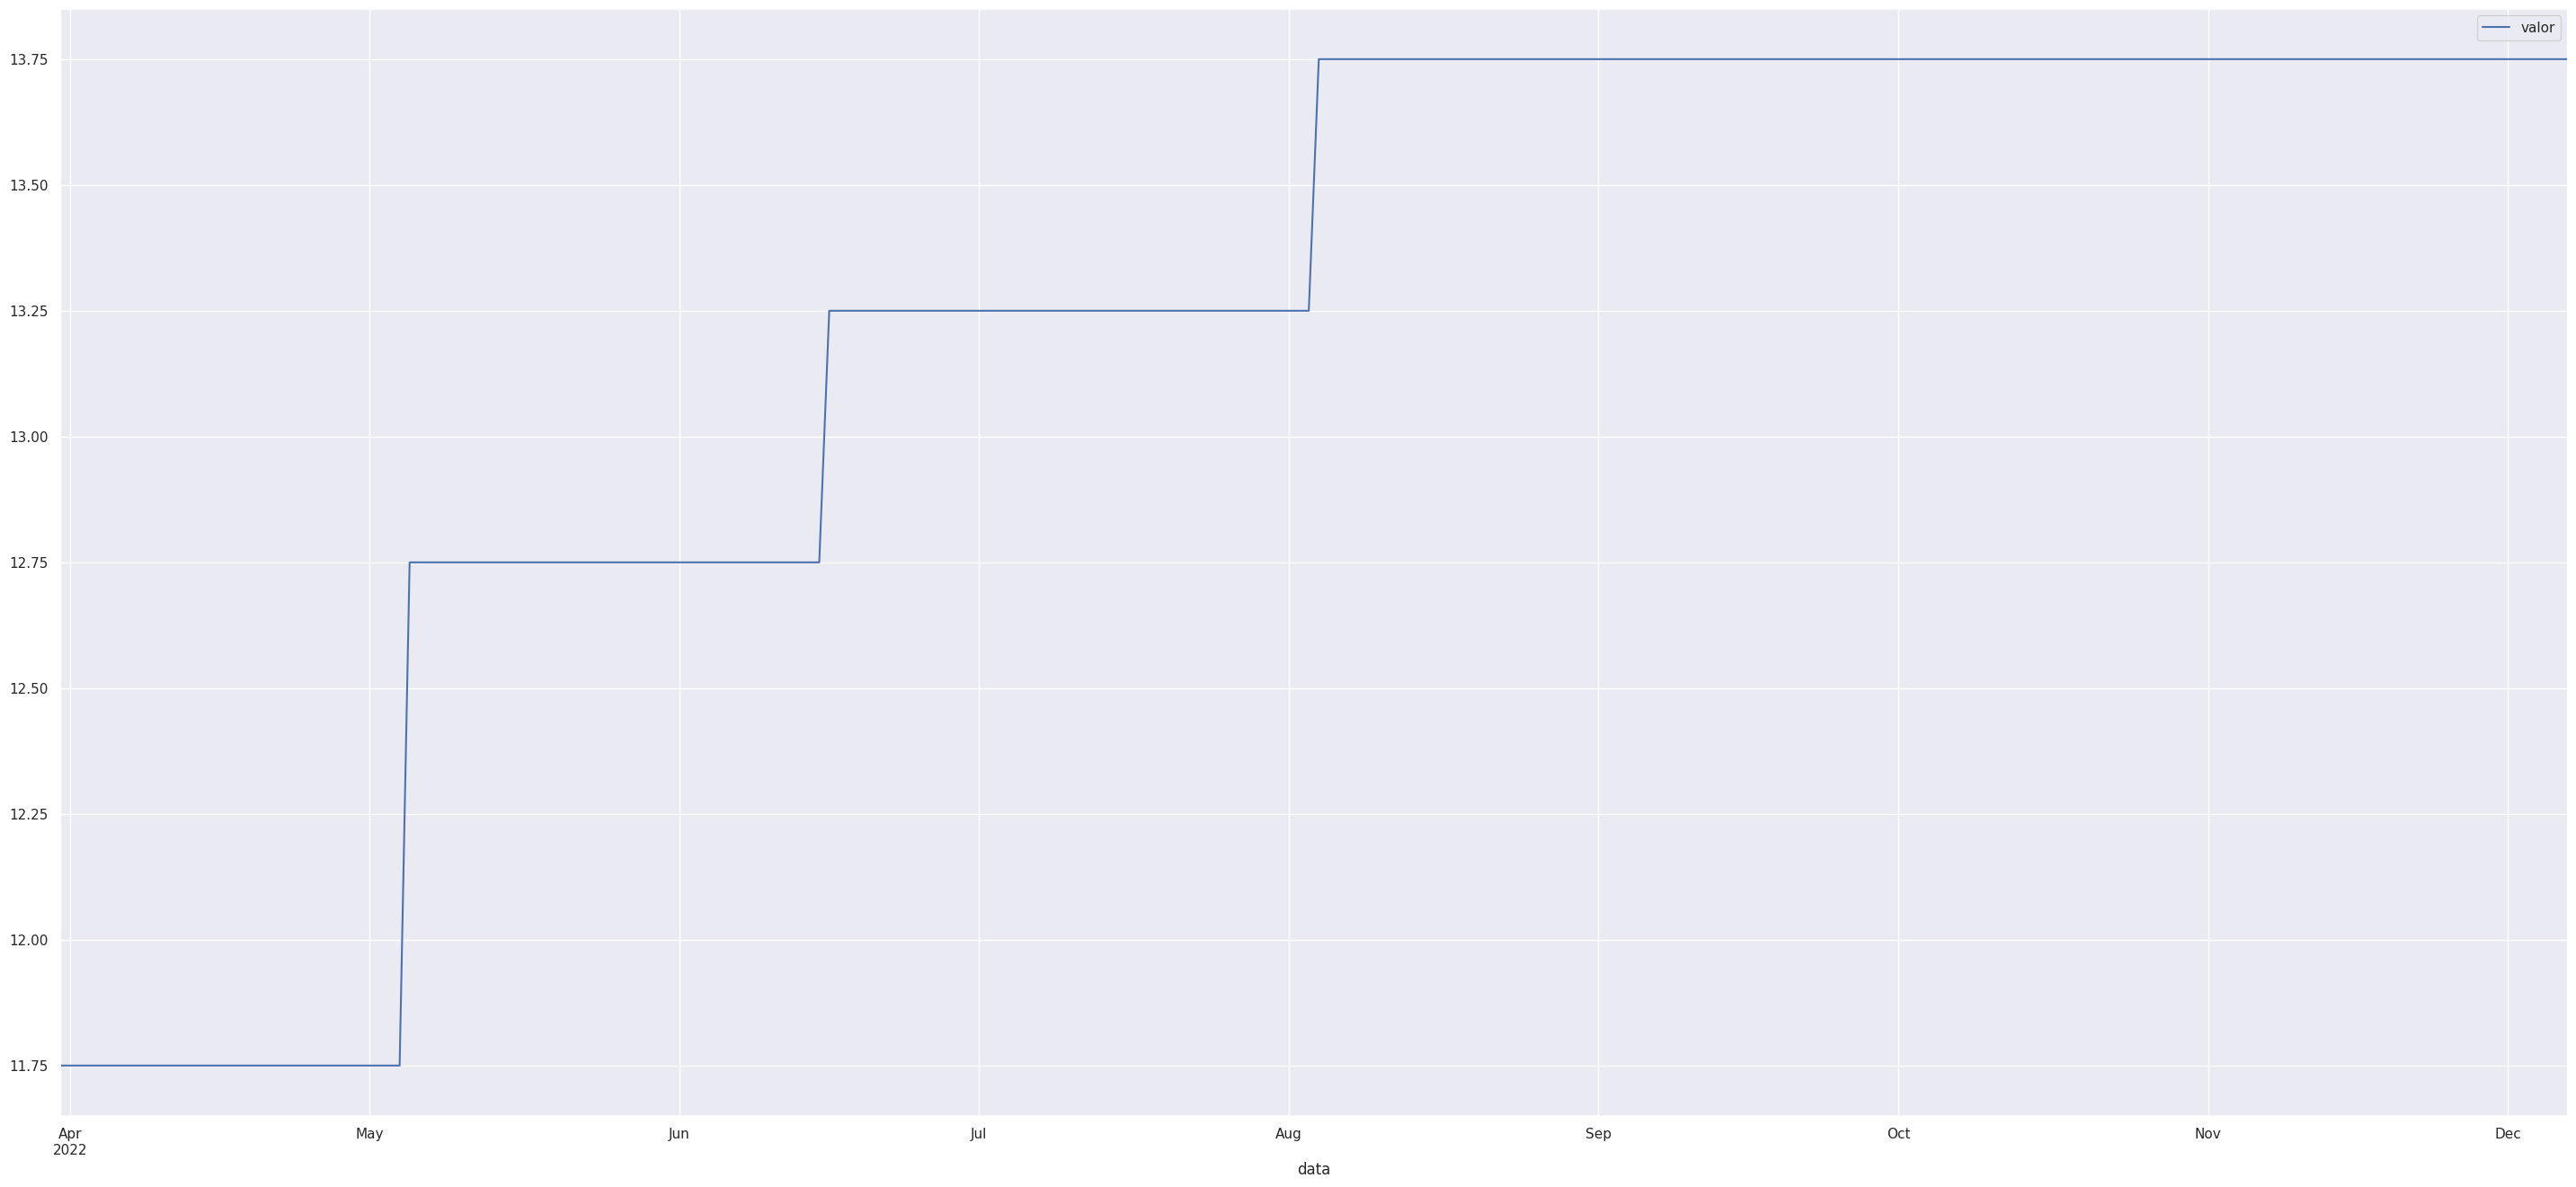

In [45]:
selic_meta[-252:].plot();

In [46]:
ipca[-15:]

,valor
data,
2021-08-01,0.87
2021-09-01,1.16
2021-10-01,1.25
2021-11-01,0.95
2021-12-01,0.73
2022-01-01,0.54
2022-02-01,1.01
2022-03-01,1.62
2022-04-01,1.06


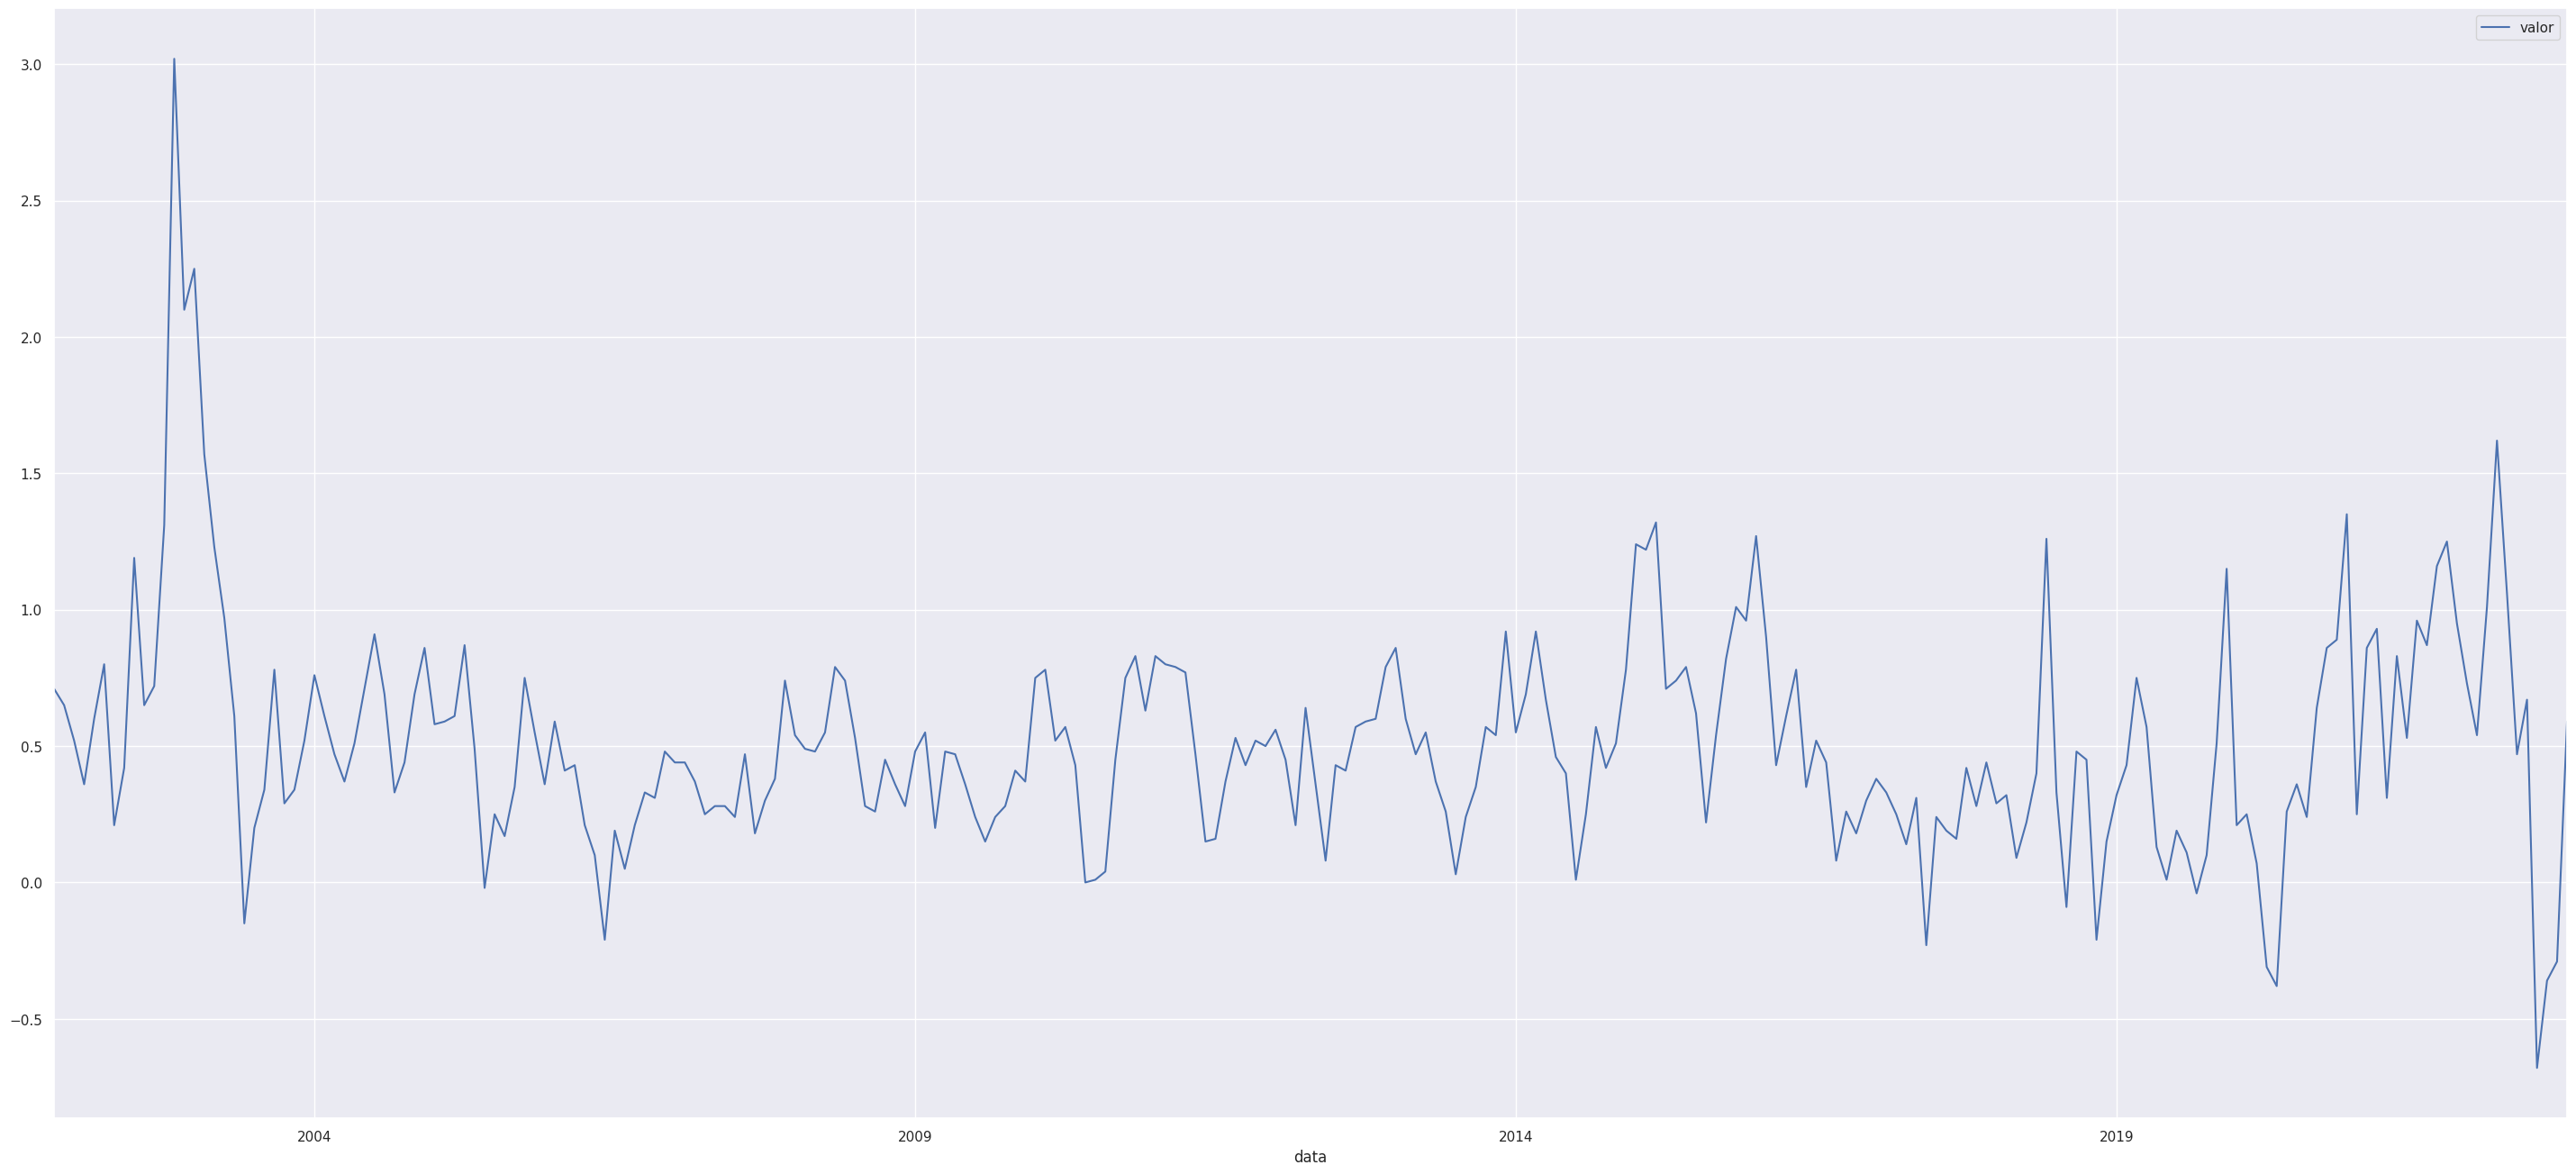

In [47]:
ipca[-252:].plot();

In [48]:
ipca_12

,valor
data,
1980-12-01,99.25
1981-01-01,99.67
1981-02-01,103.07
1981-03-01,101.03
1981-04-01,103.27
...,...
2022-06-01,11.89
2022-07-01,10.07
2022-08-01,8.73


### **Using sidrapy**
https://sidrapy.readthedocs.io/pt_BR/latest/

In [49]:
import sidrapy

In [50]:
data = sidrapy.get_table(table_code="1737", territorial_level="1", ibge_territorial_code="all", period="last 200")
data2 = data[['V', 'D2N', 'D3N']]
data2 = data2[data2['D3N']==data['D3N'][1]]
data2

,V,D2N,D3N
1,2571.8300000000000,março 2006,IPCA - Número-índice (base: dezembro de 1993 =...
7,2577.2300000000000,abril 2006,IPCA - Número-índice (base: dezembro de 1993 =...
13,2579.8100000000000,maio 2006,IPCA - Número-índice (base: dezembro de 1993 =...
19,2574.3900000000000,junho 2006,IPCA - Número-índice (base: dezembro de 1993 =...
25,2579.2800000000000,julho 2006,IPCA - Número-índice (base: dezembro de 1993 =...
...,...,...,...
1171,6455.8500000000000,junho 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1177,6411.9500000000000,julho 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1183,6388.8700000000000,agosto 2022,IPCA - Número-índice (base: dezembro de 1993 =...
1189,6370.3400000000000,setembro 2022,IPCA - Número-índice (base: dezembro de 1993 =...


In [ ]:
#sidrapy.get_table()

In [51]:
def get_ipca():
    new_dates = []
    data = sidrapy.get_table(table_code="1737", territorial_level="1", ibge_territorial_code="all", period="last 500")
    data2 = data[['V', 'D2N', 'D3N']]
    ipca = data2[data2['D3N']==data['D3N'][1]]
    list_names = ['janeiro ', 'fevereiro ', 'março ', 'abril ', 'maio ', 'junho ', 'julho ', 'agosto ', 'setembro ', 'outubro ', 'novembro ', 'dezembro ']
    list_dates = ['01-01-', '01-02-', '01-03-', '01-04-', '01-05-', '01-06-', '01-07-', '01-08-', '01-09-', '01-10-', '01-11-', '01-12-']
    for i in range(len(ipca['D2N'].values)):
        string_temp = ipca['D2N'].values[i]
        for j in range(len(list_names)):
            if list_names[j] in string_temp:
                string_temp = string_temp.replace(list_names[j], list_dates[j])
                new_dates.append(string_temp)
    ipca['D2N'] = pd.to_datetime(new_dates, format='%d-%m-%Y')
    ipca = ipca[['D2N', 'V']]
    ipca = ipca.rename(columns={'D2N':'Date', 'V':'Numero Indice'})
    return ipca

In [52]:
df_ipca = get_ipca()

/tmp/ipykernel_54496/2975685601.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca['D2N'] = pd.to_datetime(new_dates, format='%d-%m-%Y')


In [53]:
df_ipca = df_ipca.reset_index(drop=True)
df_ipca

,Date,Numero Indice
0,1981-03-01,0.0000000181134
1,1981-04-01,0.0000000192839
2,1981-05-01,0.0000000203560
3,1981-06-01,0.0000000214792
4,1981-07-01,0.0000000228229
...,...,...
495,2022-06-01,6455.8500000000000
496,2022-07-01,6411.9500000000000
497,2022-08-01,6388.8700000000000
498,2022-09-01,6370.3400000000000


In [54]:
df_ipca[df_ipca['Date']== '2019-4-01']['Numero Indice'].iloc[0]

'5206.9800000000000'

In [40]:
df_ipca.tail(20)

,Date,Numero Indice
480,2021-01-01,5574.4900000000000
481,2021-02-01,5622.4300000000000
482,2021-03-01,5674.7200000000000
483,2021-04-01,5692.3100000000000
484,2021-05-01,5739.5600000000000
485,2021-06-01,5769.9800000000000
486,2021-07-01,5825.3700000000000
487,2021-08-01,5876.0500000000000
488,2021-09-01,5944.2100000000000
489,2021-10-01,6018.5100000000000
